In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
sns.set_style('darkgrid')
sns.set_palette("Blues_r")
sns.set(rc={'figure.figsize':(12,6)})
sns.set_context(rc={"axes.facecolor": ".9", "axes.titlesize":16,"axes.labelsize":15,})

In [4]:
hdf = pd.read_csv("data/heights_weights.csv")['Height(Inches)']

## The normal Curve

Many data had histograms that look bell-shaped, e.g. heights, weights, IQ scores:

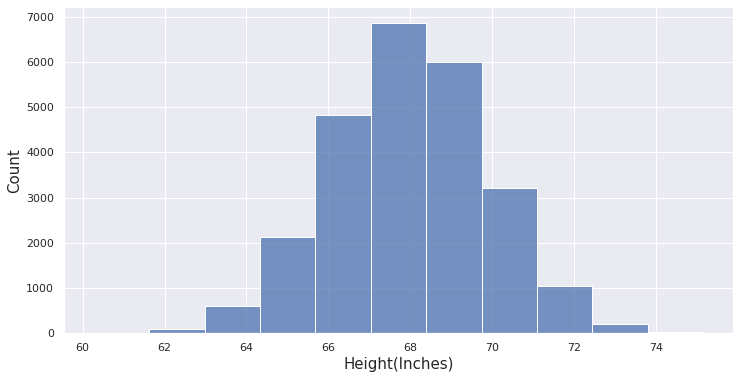

In [9]:

_ = sns.histplot(hdf, bins=11)

## Empirical Rule

If the data follows the data follows the normal curve, then:
* about 2/3 (68%) of the data falls within one standard deviation ($\sigma$) of the mean ($\mu$)
* about 95% fall within 2 standard deviation ($2\sigma$) of the mean ($\mu$)
* about 99.7% fall within 3 standard deviation ($3\sigma$) of the mean ($\mu$)

In [6]:
mean, std = hdf.mean(), hdf.std()
print(f"The data distribution has a μ={mean:0.2f} and σ={std:0.2f}")

The data distribution has a μ=67.99 and σ=1.90


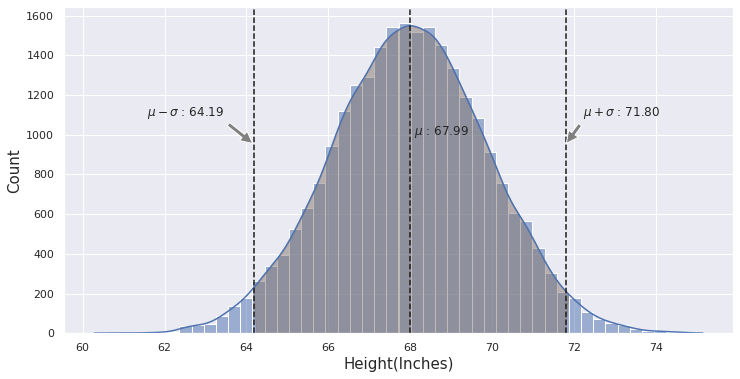

In [7]:

ax = sns.histplot(hdf, bins=50, kde=True)
kde_x, kde_y = ax.lines[0].get_data()

# The number os standard deviations to plot
n = 2
a_1 = (mean - n*std)
a_2 = (mean + n*std)

# Plot horizontal lines
ax.axvline(a_1,color = 'k', linestyle="--")
ax.axvline(a_2,color = 'k', linestyle="--")
ax.axvline(mean, color = 'k', linestyle="--")

# Annotate the inferior standard deviation line
ax.annotate(f'$\mu -\sigma$ : {a_1:0.2f}', xy=(a_1, 950),  xycoords='data',
            xytext=(0.48-(n*0.12), 0.7), textcoords='axes fraction',
            arrowprops=dict(facecolor='gray', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

# Annotate the superior standard deviation line
ax.annotate(f'$\mu +\sigma$ : {a_2:0.2f}', xy=(a_2, 950),  xycoords='data',
            xytext=(0.67+(n*0.11), 0.7), textcoords='axes fraction',
            arrowprops=dict(facecolor='gray', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

# Annotate the mean line
ax.annotate(f'$\mu$ : {mean:0.2f}',xy = (mean+0.1,1000))

# Fill the area within the interval
_ = ax.fill_between(kde_x, kde_y, 
where=(kde_x > a_1) & (kde_x < a_2) , 
interpolate=True, color='#85756d', alpha=0.50)

we can verify now this empirical rule:

In [8]:
# Total data points
total_data_points = hdf.count()

# Total data that falls between (u-a, u+a)
fall_in_between = hdf[hdf.between(a_1, a_2)].count()

# Percentage of the data that falls in the interval
percent = (fall_in_between/total_data_points)*100
print(f"{percent:0.2f}%")

95.46%


run again using `n` equals 1, 3 and 4